In [3]:
from typing import TypedDict # Imports all the data types we need
from langgraph.graph import StateGraph

In [4]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [5]:
def first_node(state:AgentState) -> AgentState:
    """This is the first node of our sequence"""

    state["final"] = f"Hi {state["name"]}!"
    return state

def second_node(state:AgentState) -> AgentState:
    """This is the second node of our sequence"""

    state["final"] = state["final"] + f" You are {state["age"]} years old!"

    return state

In [10]:
graph = StateGraph(AgentState)
graph.set_entry_point("first")
graph.add_node("first" , first_node)
graph.add_node("second" , second_node)
graph.add_edge("first","second")
graph.set_finish_point("second")

app = graph.compile()


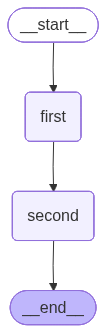

In [11]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
result = app.invoke({"age":22,"name":"shawky"})

In [14]:
print(result)

{'name': 'shawky', 'age': 22, 'final': 'Hi shawky! You are 22 years old!'}
